### **Import Libraries**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime

### **Import Dataset**

In [ ]:
#import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-test-db.csv')
#import dataset from local drive when running offline 
#df = pd.read_csv('C:/Users/simit/IdeaProjects/untitled/data-test-db.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#change dataset index to date index
df['salesDateEST']= pd.to_datetime(df['salesDateEST']).dt.date
df=df.set_index('salesDateEST')
df=df.sort_index()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1311 entries, 2022-04-01 to 2022-08-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   collection  1311 non-null   object 
 1   price       1311 non-null   float64
 2   avgPrice    1311 non-null   float64
dtypes: float64(2), object(1)
memory usage: 41.0+ KB


,collection,price,avgPrice
salesDateEST,,,
2022-04-01,Mutant Ape Yacht Club,4.808152e+06,77550.834194
2022-04-01,Solana Monkey Business,4.560823e+05,38006.861405
2022-04-01,ZED RUN,1.510627e+05,138.082898
2022-04-01,Crypto Unicorns Shadowcorns,4.239578e+04,1009.423422
2022-04-01,Bored Ape Yacht Club,8.352337e+06,298297.740714


In [ ]:
df.shape

(1311, 3)

In [ ]:
#Seperate dataset for each NFT collection also selecting only avgPrice
BAYC=df[df['collection']=='Bored Ape Yacht Club'].copy().filter(['avgPrice'])
CP=df[df['collection']=='CryptoPunks'].copy().filter(['avgPrice'])
MAYC=df[df['collection']=='Mutant Ape Yacht Club'].copy().filter(['avgPrice'])
SMB=df[df['collection']=='Solana Monkey Business'].copy().filter(['avgPrice'])
DAA=df[df['collection']=='Degenerate Ape Academy'].copy().filter(['avgPrice'])
OB=df[df['collection']=='Okay Bears'].copy().filter(['avgPrice'])
ZR=df[df['collection']=='ZED RUN'].copy().filter(['avgPrice'])
CU=df[df['collection']=='Crypto Unicorns'].copy().filter(['avgPrice'])
CUS=df[df['collection']=='Crypto Unicorns Shadowcorns'].copy().filter(['avgPrice'])

# **Visualize Dataset**

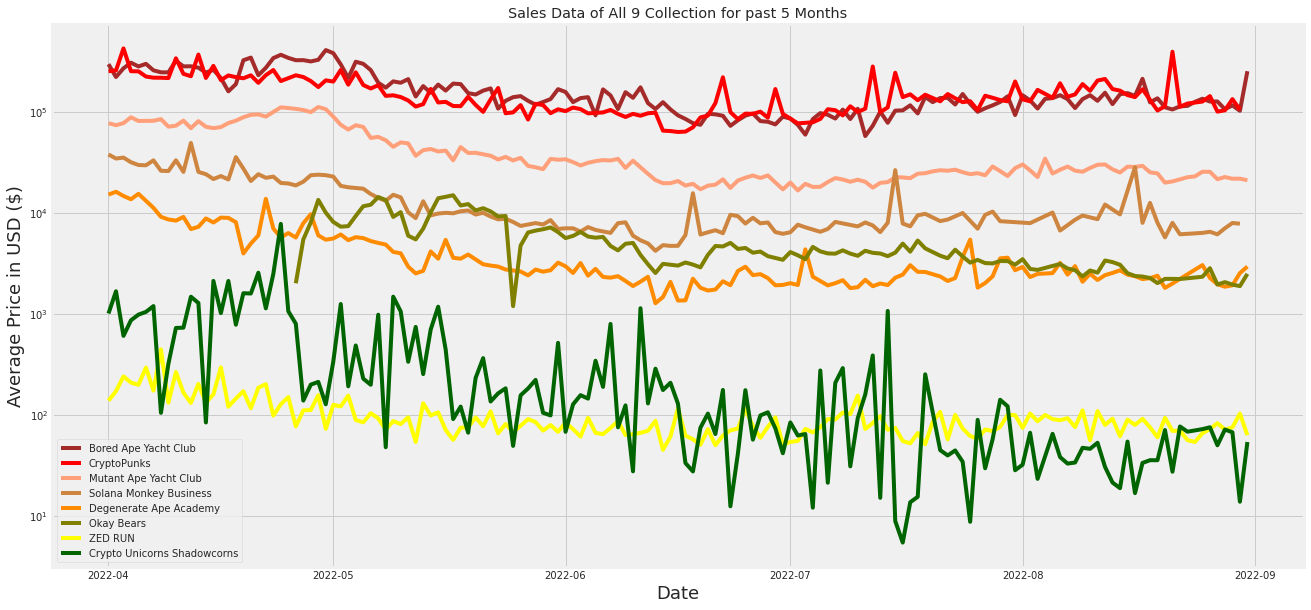

In [ ]:
#Plotting each NFT collection on one graph
collectiondf_list = [BAYC, CP, MAYC, SMB, DAA, OB, ZR, CUS]
short_list = ["BAYC", "CP", "MAYC", "SMB", "DAA", "OB", "ZR","CUS"]
collection_name=["Bored Ape Yacht Club","CryptoPunks","Mutant Ape Yacht Club","Solana Monkey Business","Degenerate Ape Academy","Okay Bears","ZED RUN","Crypto Unicorns Shadowcorns"]
color_list = ["brown", "red", "lightsalmon", "peru", "darkorange", "olive", "yellow", "darkgreen"]
plt.figure(figsize=(20,10))
plt.title('Sales Data of All 9 Collection for past 5 Months')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price in USD ($)', fontsize=18)
for i in range(len(collectiondf_list)):
  plt.plot(collectiondf_list[i], c=color_list[i])
plt.legend(collection_name, loc='lower left')
plt.yscale('log')
plt.show()

In [ ]:
#Creating a column collection_name with the name of collection
for collectiondf, col_name in zip(collectiondf_list, collection_name):
    collectiondf["collection_name"] = col_name
    
dfa = pd.concat(collectiondf_list, axis=0)
dfa.tail(10)

,avgPrice,collection_name
salesDateEST,,
2022-08-21,27.334566,Crypto Unicorns Shadowcorns
2022-08-22,76.745157,Crypto Unicorns Shadowcorns
2022-08-23,68.117785,Crypto Unicorns Shadowcorns
2022-08-25,72.207253,Crypto Unicorns Shadowcorns
2022-08-26,75.325656,Crypto Unicorns Shadowcorns
2022-08-27,49.947464,Crypto Unicorns Shadowcorns
2022-08-28,71.522286,Crypto Unicorns Shadowcorns
2022-08-29,67.192859,Crypto Unicorns Shadowcorns
2022-08-30,13.788021,Crypto Unicorns Shadowcorns


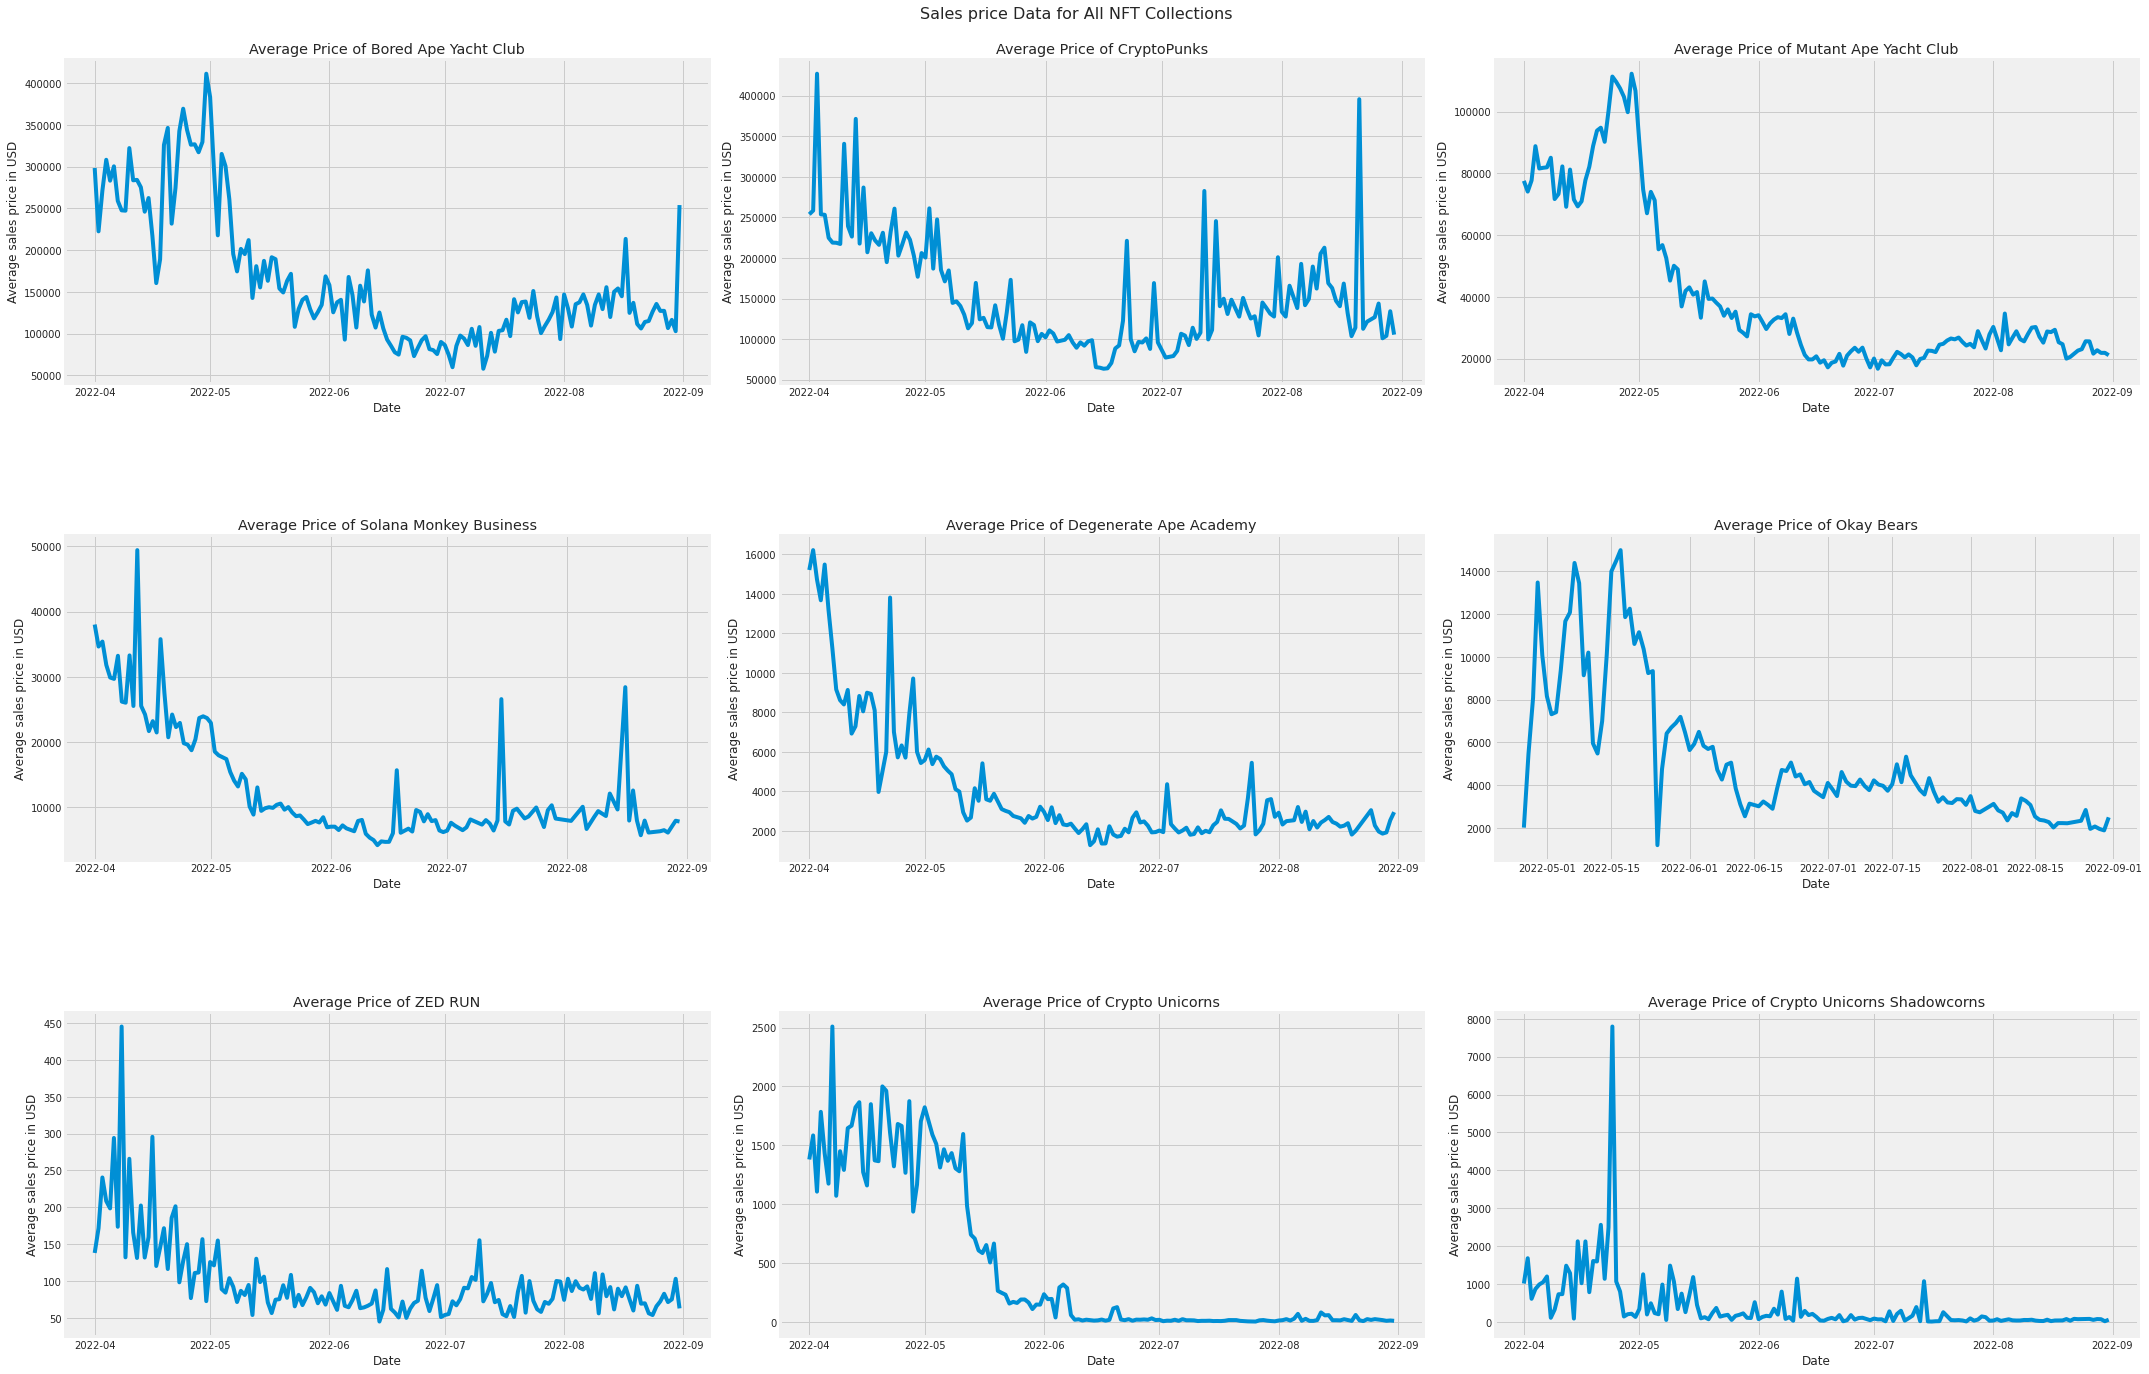

In [ ]:
#plotting each NFT collection dataset of different graphs to get better view
plt.figure(figsize=(30, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.suptitle("Sales price Data for All NFT Collections", fontsize=16)

for i, collection in enumerate(collectiondf_list, 1):
    plt.subplot(3, 3, i)
    collection['avgPrice'].plot()
    plt.ylabel('Average sales price in USD')
    plt.xlabel('Date')
    #plt.xlim([datetime.date(2022, 4, 1), datetime.date(2022, 8, 31)])
    plt.title(f"Average Price of {collection_name[i - 1]}")
    
plt.tight_layout()

### **Moving Average**

> Calculation that takes the arithmetic mean of a given set of prices over a specific number of days in the past.



In [ ]:
#Calculating moving average for each collection
ma_day = [10, 30, 50]

for ma in ma_day:
    for collection in collectiondf_list:
        column_name = f"Moving Aaverage for {ma} days"
        collection['logPrice']=np.log(collection['avgPrice'])
        collection[column_name] = collection['logPrice'].rolling(ma).mean()

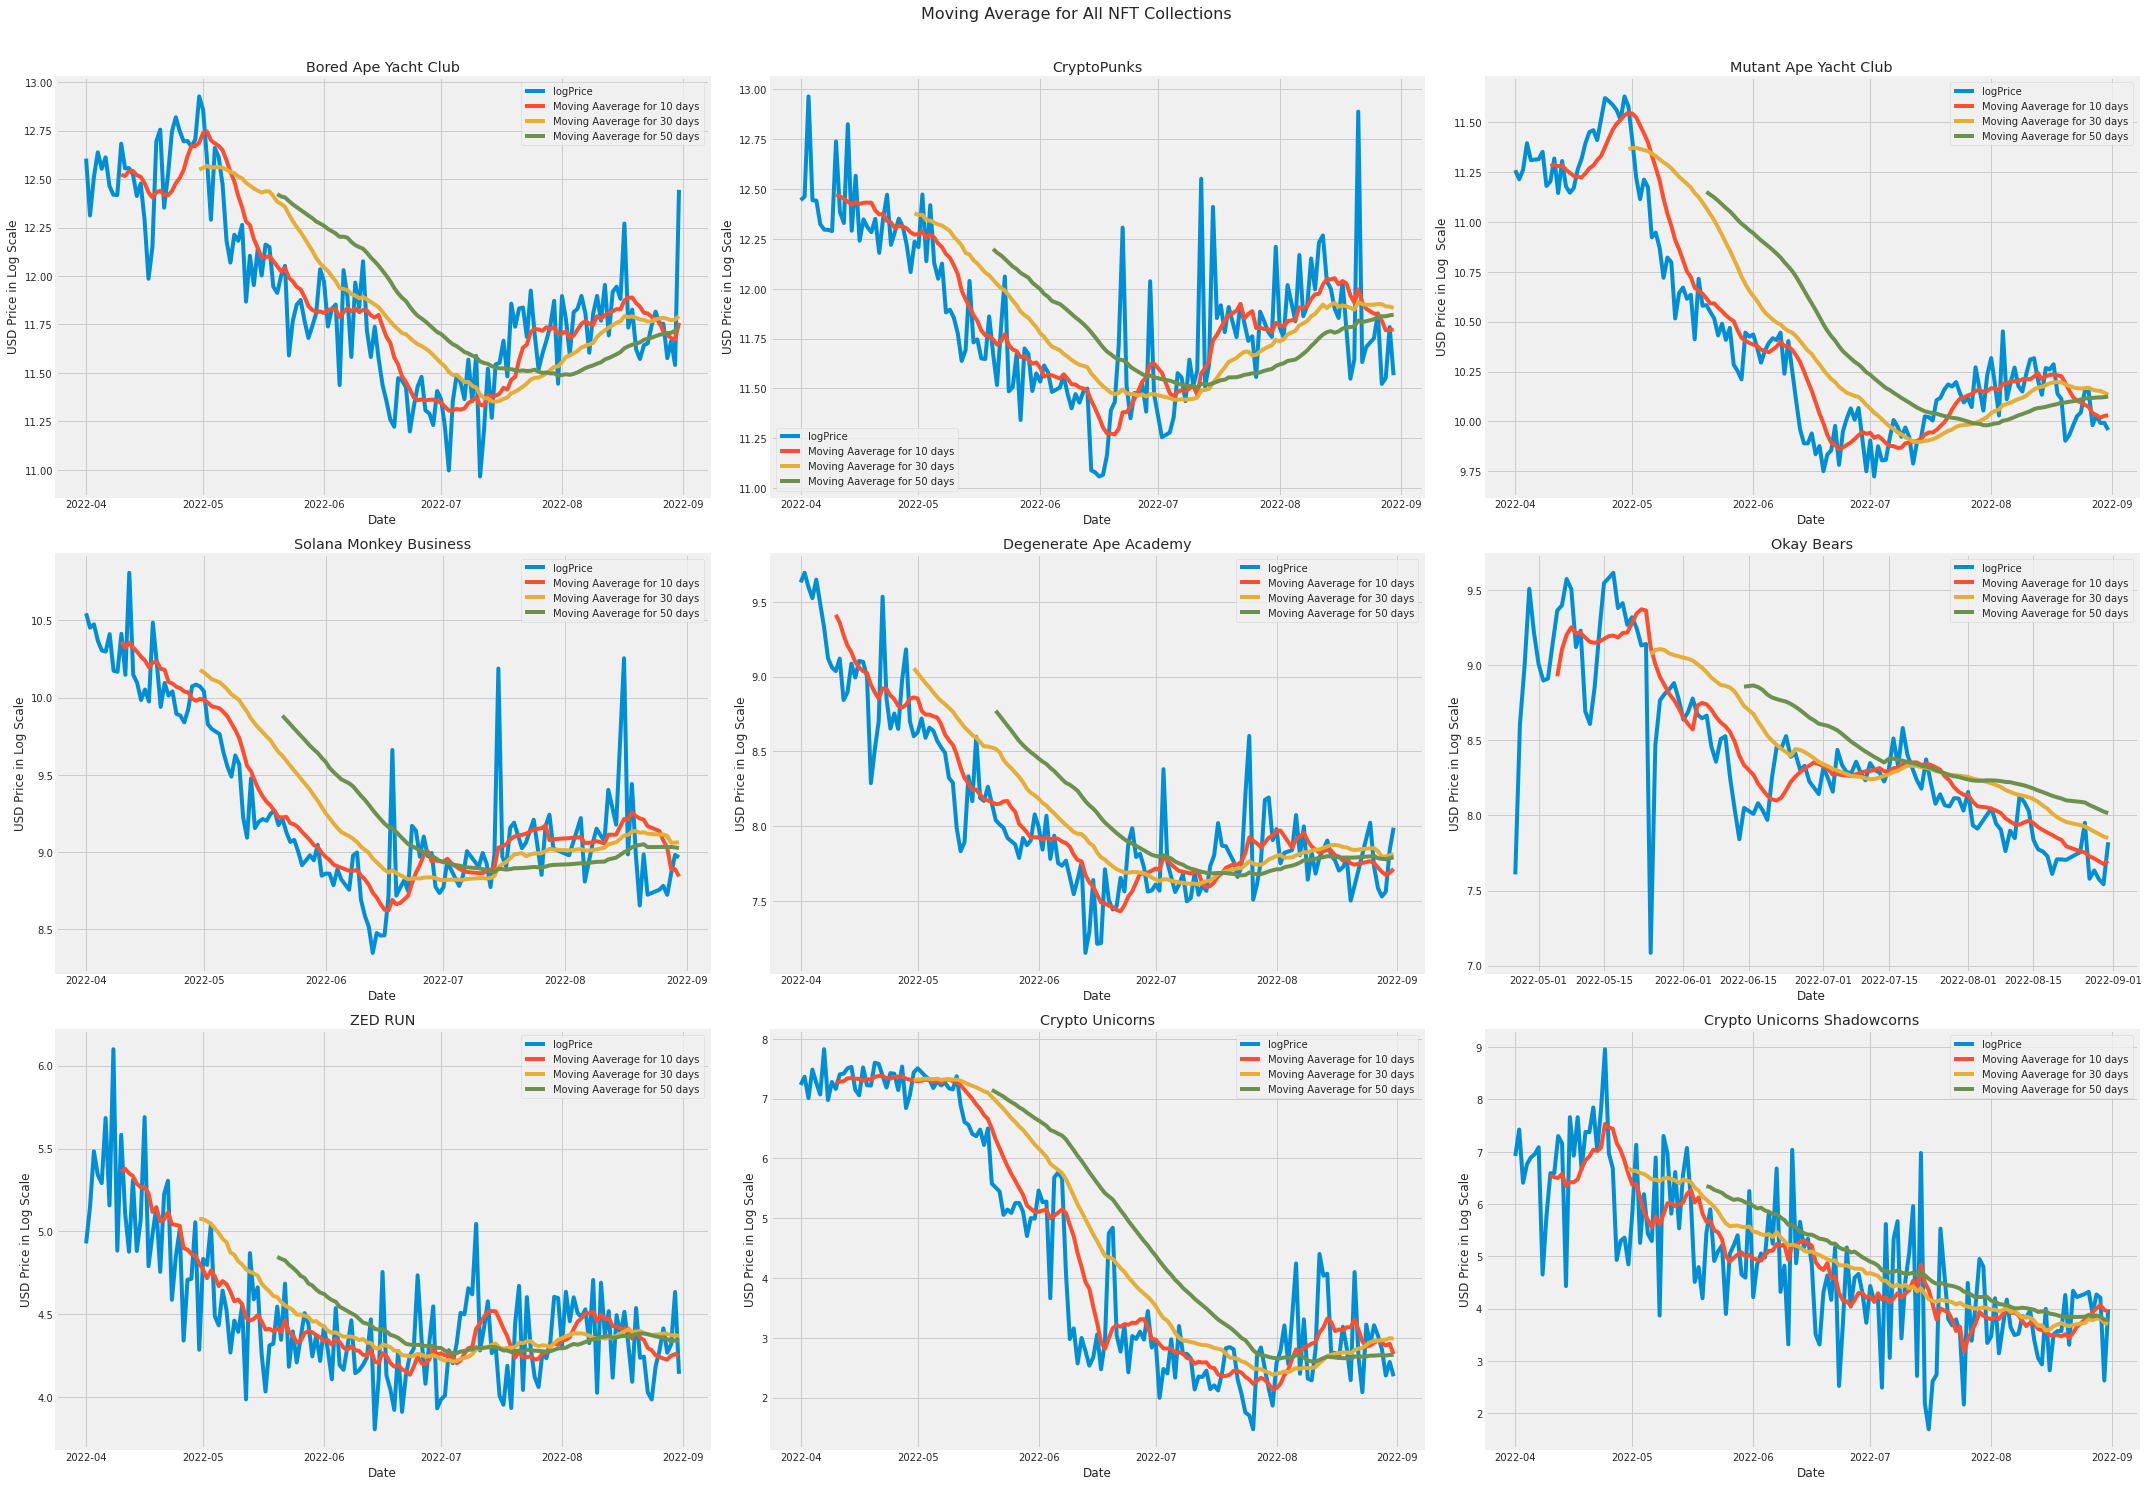

In [ ]:
#plotting Moving Average
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.suptitle("Moving Average for All NFT Collections", fontsize=16, y=1.03)
fig.set_figheight(20)
fig.set_figwidth(30)


BAYC[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Bored Ape Yacht Club')
axes[0,0].set_ylabel('USD Price in Log Scale')
axes[0,0].set_xlabel('Date')
CP[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('CryptoPunks')
axes[0,1].set_ylabel('USD Price in Log Scale')
axes[0,1].set_xlabel('Date')
MAYC[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('Mutant Ape Yacht Club')
axes[0,2].set_ylabel('USD Price in Log  Scale')
axes[0,2].set_xlabel('Date')
SMB[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Solana Monkey Business')
axes[1,0].set_ylabel('USD Price in Log Scale')
axes[1,0].set_xlabel('Date')
DAA[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Degenerate Ape Academy')
axes[1,1].set_ylabel('USD Price in Log Scale')
axes[1,1].set_xlabel('Date')
OB[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('Okay Bears')
axes[1,2].set_ylabel('USD Price in Log Scale')
axes[1,2].set_xlabel('Date')
ZR[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('ZED RUN')
axes[2,0].set_ylabel('USD Price in Log Scale')
axes[2,0].set_xlabel('Date')
CU[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Crypto Unicorns')
axes[2,1].set_ylabel('USD Price in Log Scale')
axes[2,1].set_xlabel('Date')
CUS[['logPrice', 'Moving Aaverage for 10 days', 'Moving Aaverage for 30 days', 'Moving Aaverage for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_title('Crypto Unicorns Shadowcorns')
axes[2,2].set_ylabel('USD Price in Log Scale')
axes[2,2].set_xlabel('Date')



fig.tight_layout()

### Calculate Daily Percentage Return

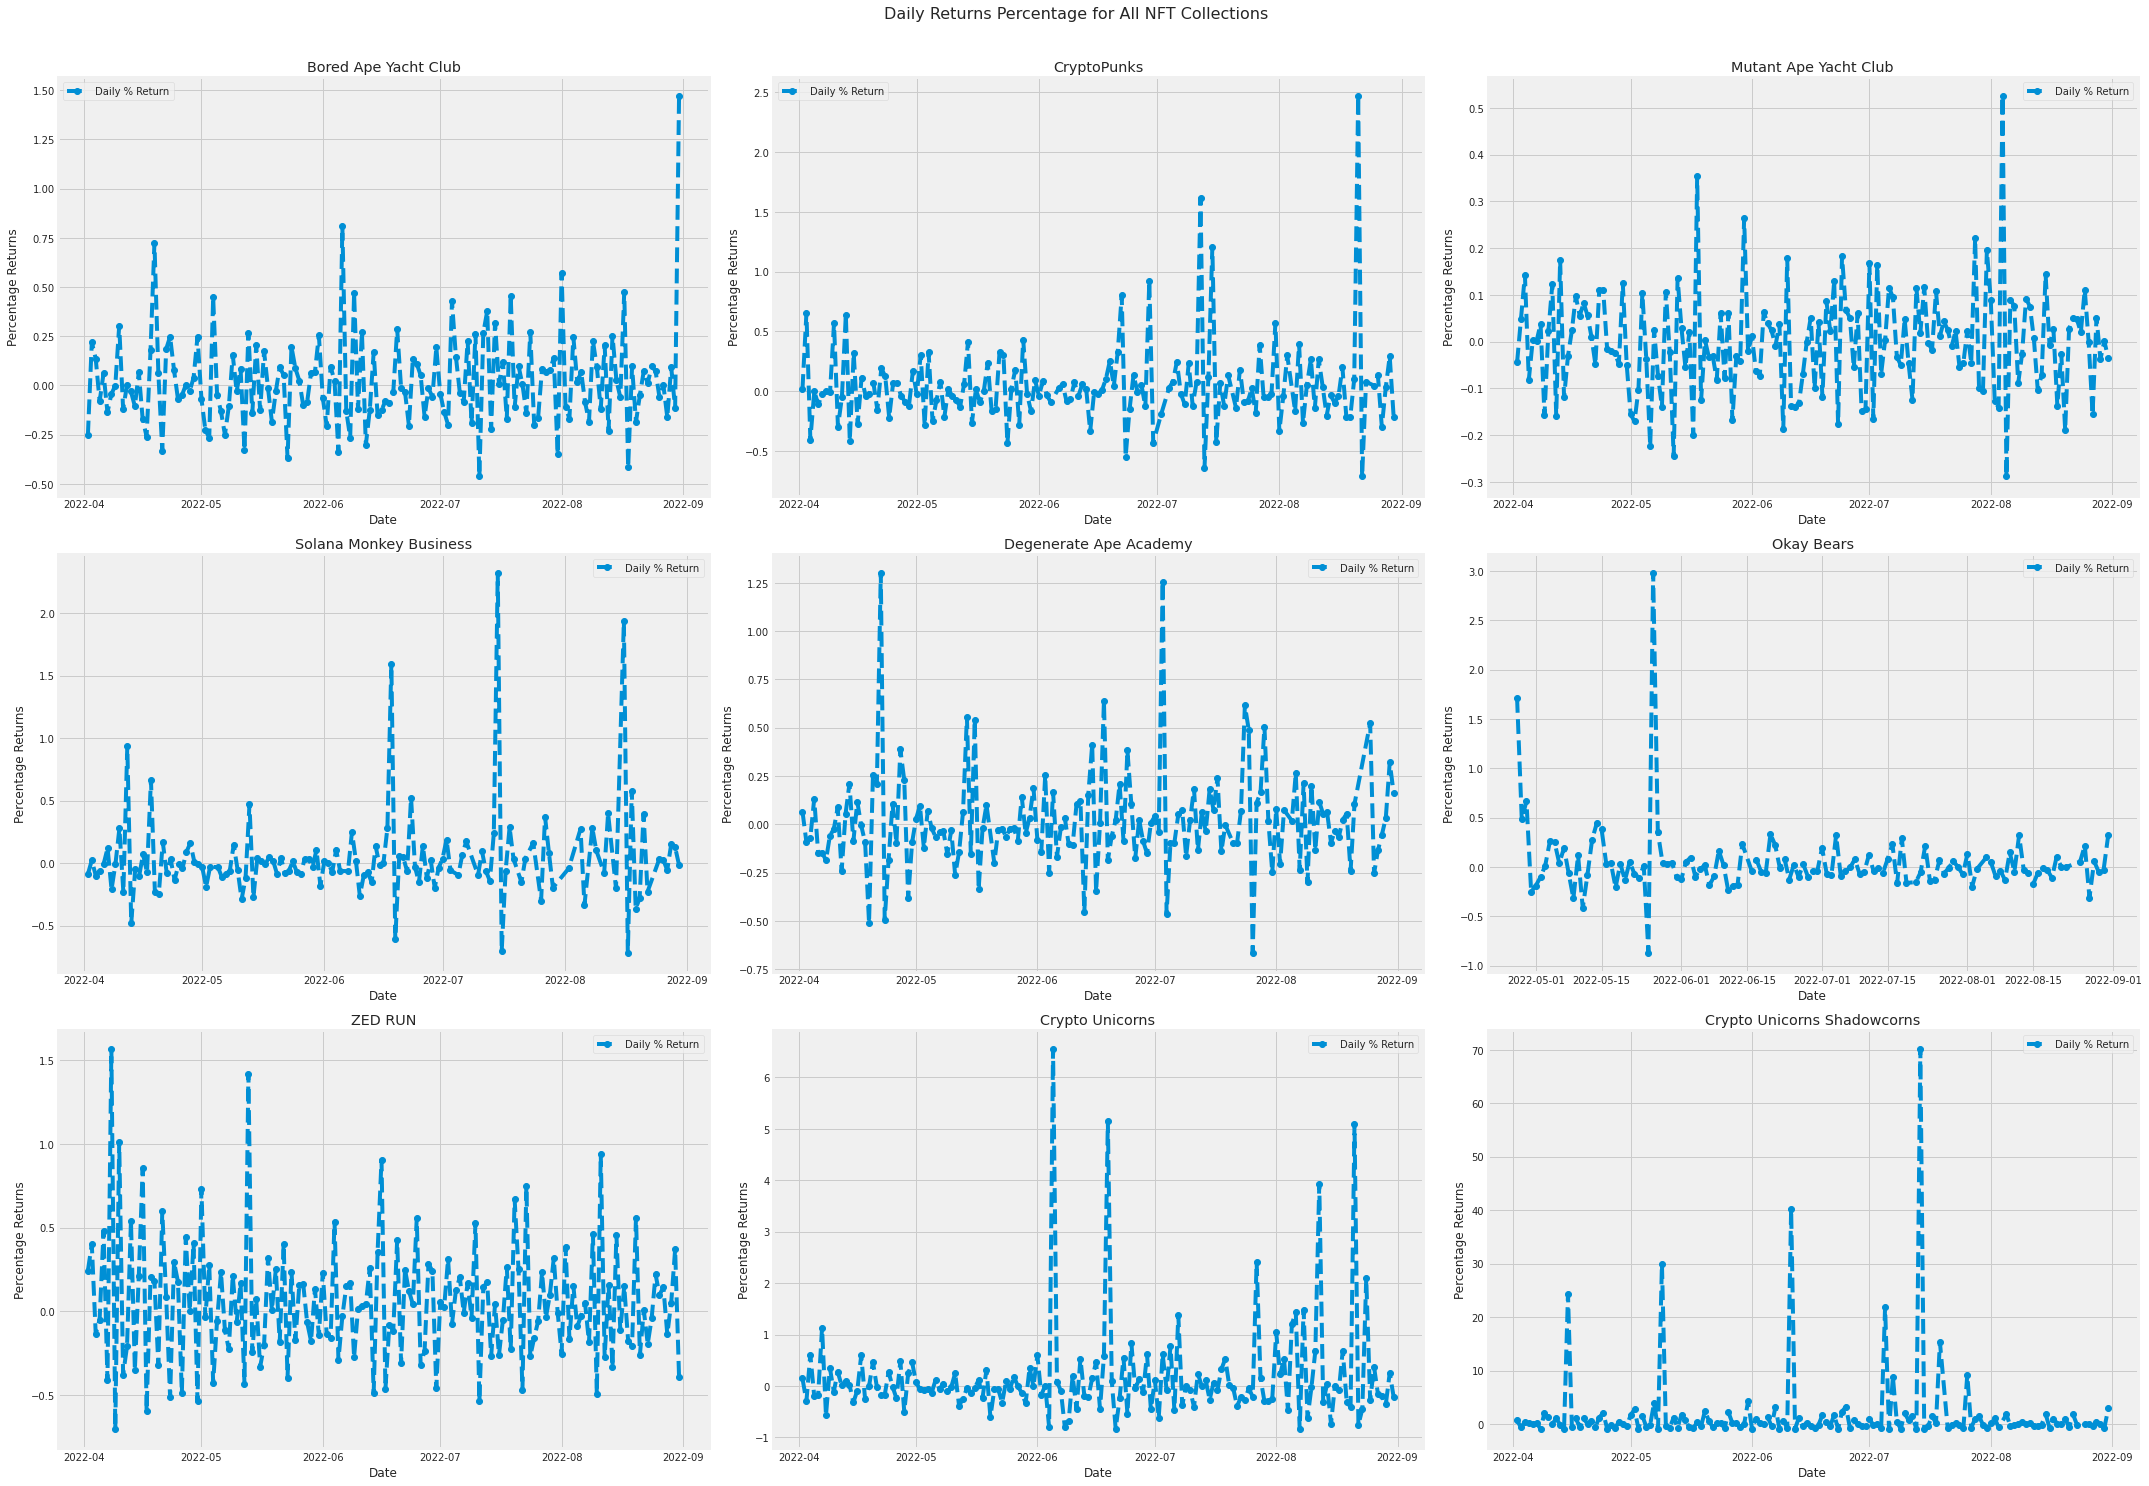

In [ ]:
#Using pct_change to find the percent change for each day
for collection in collectiondf_list:
    collection['Daily % Return'] = collection['avgPrice'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=3)
plt.suptitle("Daily Returns Percentage for All NFT Collections", fontsize=16, y=1.03)
fig.set_figheight(20)
fig.set_figwidth(30)

BAYC['Daily % Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Bored Ape Yacht Club')
axes[0,0].set_ylabel('Percentage Returns')
axes[0,0].set_xlabel('Date')
CP['Daily % Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('CryptoPunks')
axes[0,1].set_ylabel('Percentage Returns')
axes[0,1].set_xlabel('Date')
MAYC['Daily % Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('Mutant Ape Yacht Club')
axes[0,2].set_ylabel('Percentage Returns')
axes[0,2].set_xlabel('Date')
SMB['Daily % Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Solana Monkey Business')
axes[1,0].set_ylabel('Percentage Returns')
axes[1,0].set_xlabel('Date')
DAA['Daily % Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Degenerate Ape Academy')
axes[1,1].set_ylabel('Percentage Returns')
axes[1,1].set_xlabel('Date')
OB['Daily % Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('Okay Bears')
axes[1,2].set_ylabel('Percentage Returns')
axes[1,2].set_xlabel('Date')
ZR['Daily % Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('ZED RUN')
axes[2,0].set_ylabel('Percentage Returns')
axes[2,0].set_xlabel('Date')
CU['Daily % Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Crypto Unicorns')
axes[2,1].set_ylabel('Percentage Returns')
axes[2,1].set_xlabel('Date')
CUS['Daily % Return'].plot(ax=axes[2,2], legend=True, linestyle='--', marker='o')
axes[2,2].set_title('Crypto Unicorns Shadowcorns')
axes[2,2].set_ylabel('Percentage Returns')
axes[2,2].set_xlabel('Date')

fig.tight_layout()


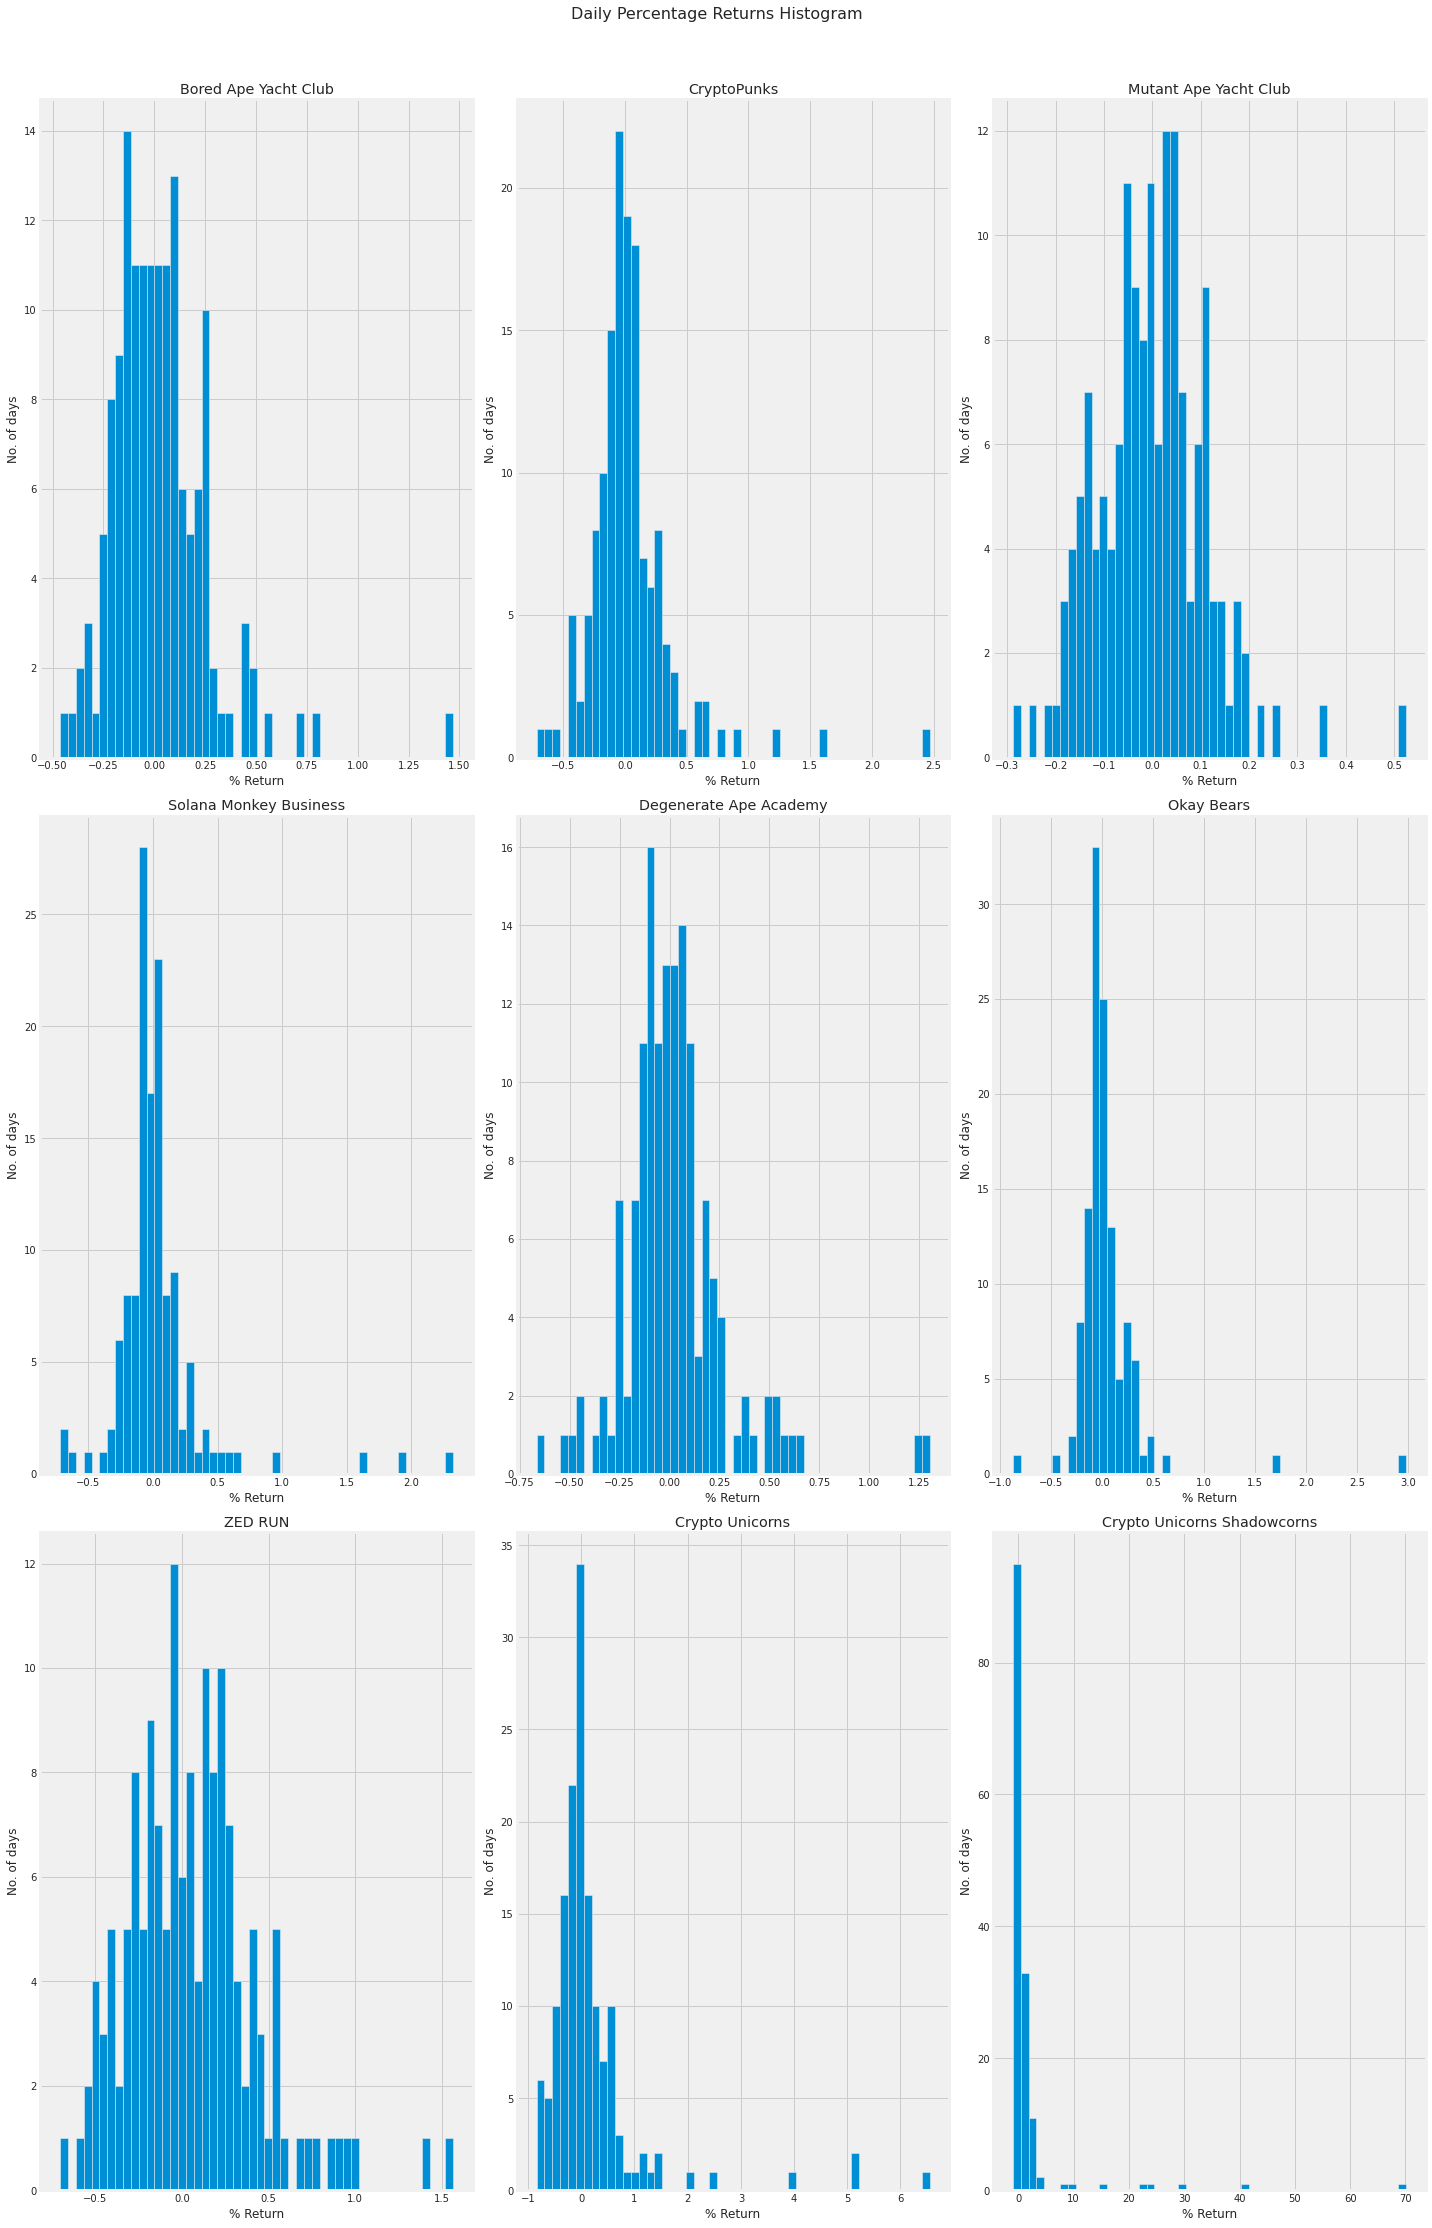

In [ ]:
#Plotting daily percentage change in histogram
plt.figure(figsize=(20, 30))
plt.suptitle("Daily Percentage Returns Histogram", fontsize=16, y=1.03)

for i, collection in enumerate(collectiondf_list, 1):
    plt.subplot(3, 3, i)
    collection['Daily % Return'].hist(bins=50)
    plt.ylabel('No. of days')
    plt.xlabel('% Return')
    plt.title(f'{collection_name[i - 1]}')
    
plt.tight_layout()

In [ ]:
#creatnig copy dataframe of BAYC collection
dfxx = BAYC.copy()
dfxx = pd.DataFrame(dfxx['logPrice'])

In [ ]:
#Joining CP collection with BAYC with same index
dfxx=dfxx.join(CP['logPrice'],lsuffix='_bayc',rsuffix='_cp')

In [ ]:
#Check first 5 rows to see if join was correct
dfxx.head()

,logPrice_bayc,logPrice_cp
salesDateEST,,
2022-04-01,12.605847,12.444349
2022-04-02,12.312353,12.462284
2022-04-03,12.510479,12.964687
2022-04-04,12.638238,12.444172
2022-04-05,12.553499,12.441899


In [ ]:
#Joining DAA with dfxx
dfxx=dfxx.join(DAA['logPrice'])

In [ ]:
#Renaming column to better name for understanding
dfxx=dfxx.rename({'logPrice':'DAA','logPrice_bayc':'BAYC','logPrice_cp':'CP'},axis=1)

In [ ]:
#Joining all the other NFT collection based on Dates and renaming column to their respective collection
dfxx=dfxx.join(MAYC['logPrice'])
dfxx=dfxx.rename({'logPrice':'MAYC'},axis=1)
dfxx=dfxx.join(SMB['logPrice'])
dfxx=dfxx.rename({'logPrice':'SMB'},axis=1)
dfxx=dfxx.join(OB['logPrice'])
dfxx=dfxx.rename({'logPrice':'OB'},axis=1)
dfxx=dfxx.join(ZR['logPrice'])
dfxx=dfxx.rename({'logPrice':'ZR'},axis=1)
dfxx=dfxx.join(CU['logPrice'])
dfxx=dfxx.rename({'logPrice':'CU'},axis=1)
dfxx=dfxx.join(CUS['logPrice'])
dfxx=dfxx.rename({'logPrice':'CUS'},axis=1)
dfxx.head()
dfxx.shape

(153, 9)

In [ ]:
#Calculatin percentage change for each column in dfxx
collection_pct_returns = dfxx.pct_change()

In [ ]:
#removing any duplicate data
collection_pct_returns =(collection_pct_returns.reset_index()
        .drop_duplicates(subset='salesDateEST', keep='first')
        .set_index('salesDateEST').sort_index())

In [ ]:
#verifying result
collection_pct_returns[collection_pct_returns.index.duplicated()]

,BAYC,CP,DAA,MAYC,SMB,OB,ZR,CU,CUS
salesDateEST,,,,,,,,,


In [ ]:
collection_pct_returns

,BAYC,CP,DAA,MAYC,SMB,OB,ZR,CU,CUS
salesDateEST,,,,,,,,,
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-02,-0.023282,0.001441,0.006647,-0.004065,-0.008810,NaN,0.044138,0.019085,0.073429
2022-04-03,0.016092,0.040314,-0.009910,0.004234,0.002083,NaN,0.065583,-0.048631,-0.137129
2022-04-04,0.010212,-0.040149,-0.007735,0.011862,-0.010205,NaN,-0.026003,0.068083,0.055496
2022-04-05,-0.006705,-0.000183,0.013048,-0.007454,-0.006000,NaN,-0.009230,-0.029373,0.019114
...,...,...,...,...,...,...,...,...,...
2022-08-27,0.000069,-0.029781,-0.018680,-0.016653,-0.006630,-0.046922,0.031275,-0.054529,-0.095064
2022-08-28,-0.015089,0.002566,-0.007329,0.005011,0.015882,0.007322,-0.033306,-0.074113,0.091803
2022-08-29,0.007632,0.022127,0.004329,-0.003854,0.013555,-0.007486,0.012037,-0.156766,-0.014623


### Correlation

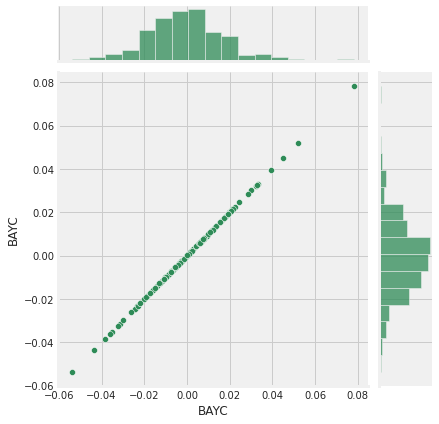

In [ ]:
#creating a joinplot of BAYC against BAYC to verify the data has positive correlation
sns.jointplot(x='BAYC', y='BAYC', data=collection_pct_returns, kind='scatter', color='seagreen')

Text(0.5, 1.03, 'Correlation of Percentage Returns')

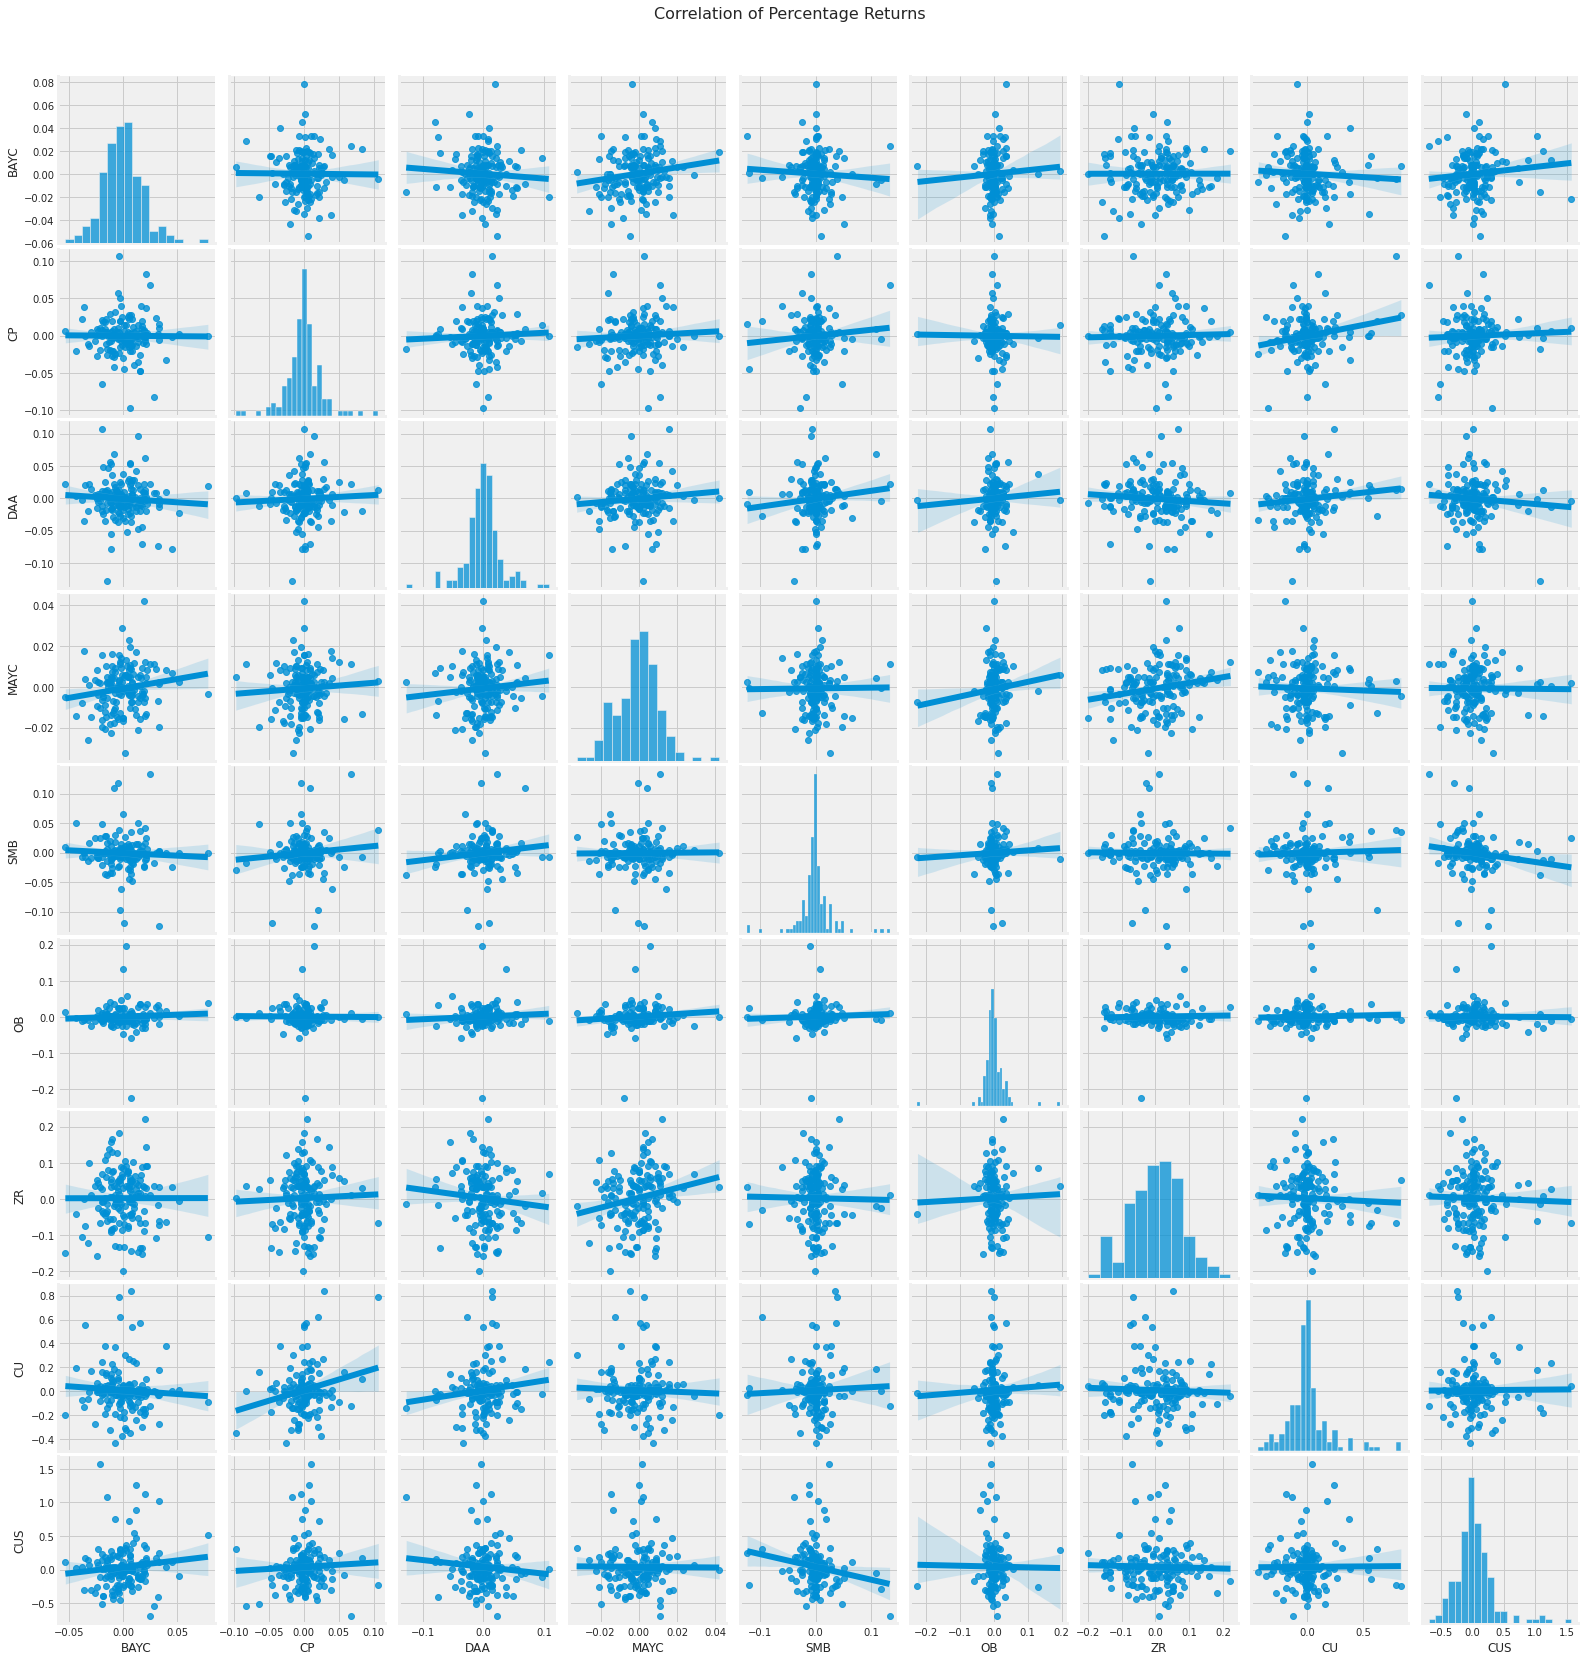

In [ ]:
#Creating a pair plot to verify correlation of percentage change for all NFT collection with each other
pp = sns.pairplot(collection_pct_returns, kind='reg')
pp.fig.suptitle("Correlation of Percentage Returns", fontsize=16, y=1.03)

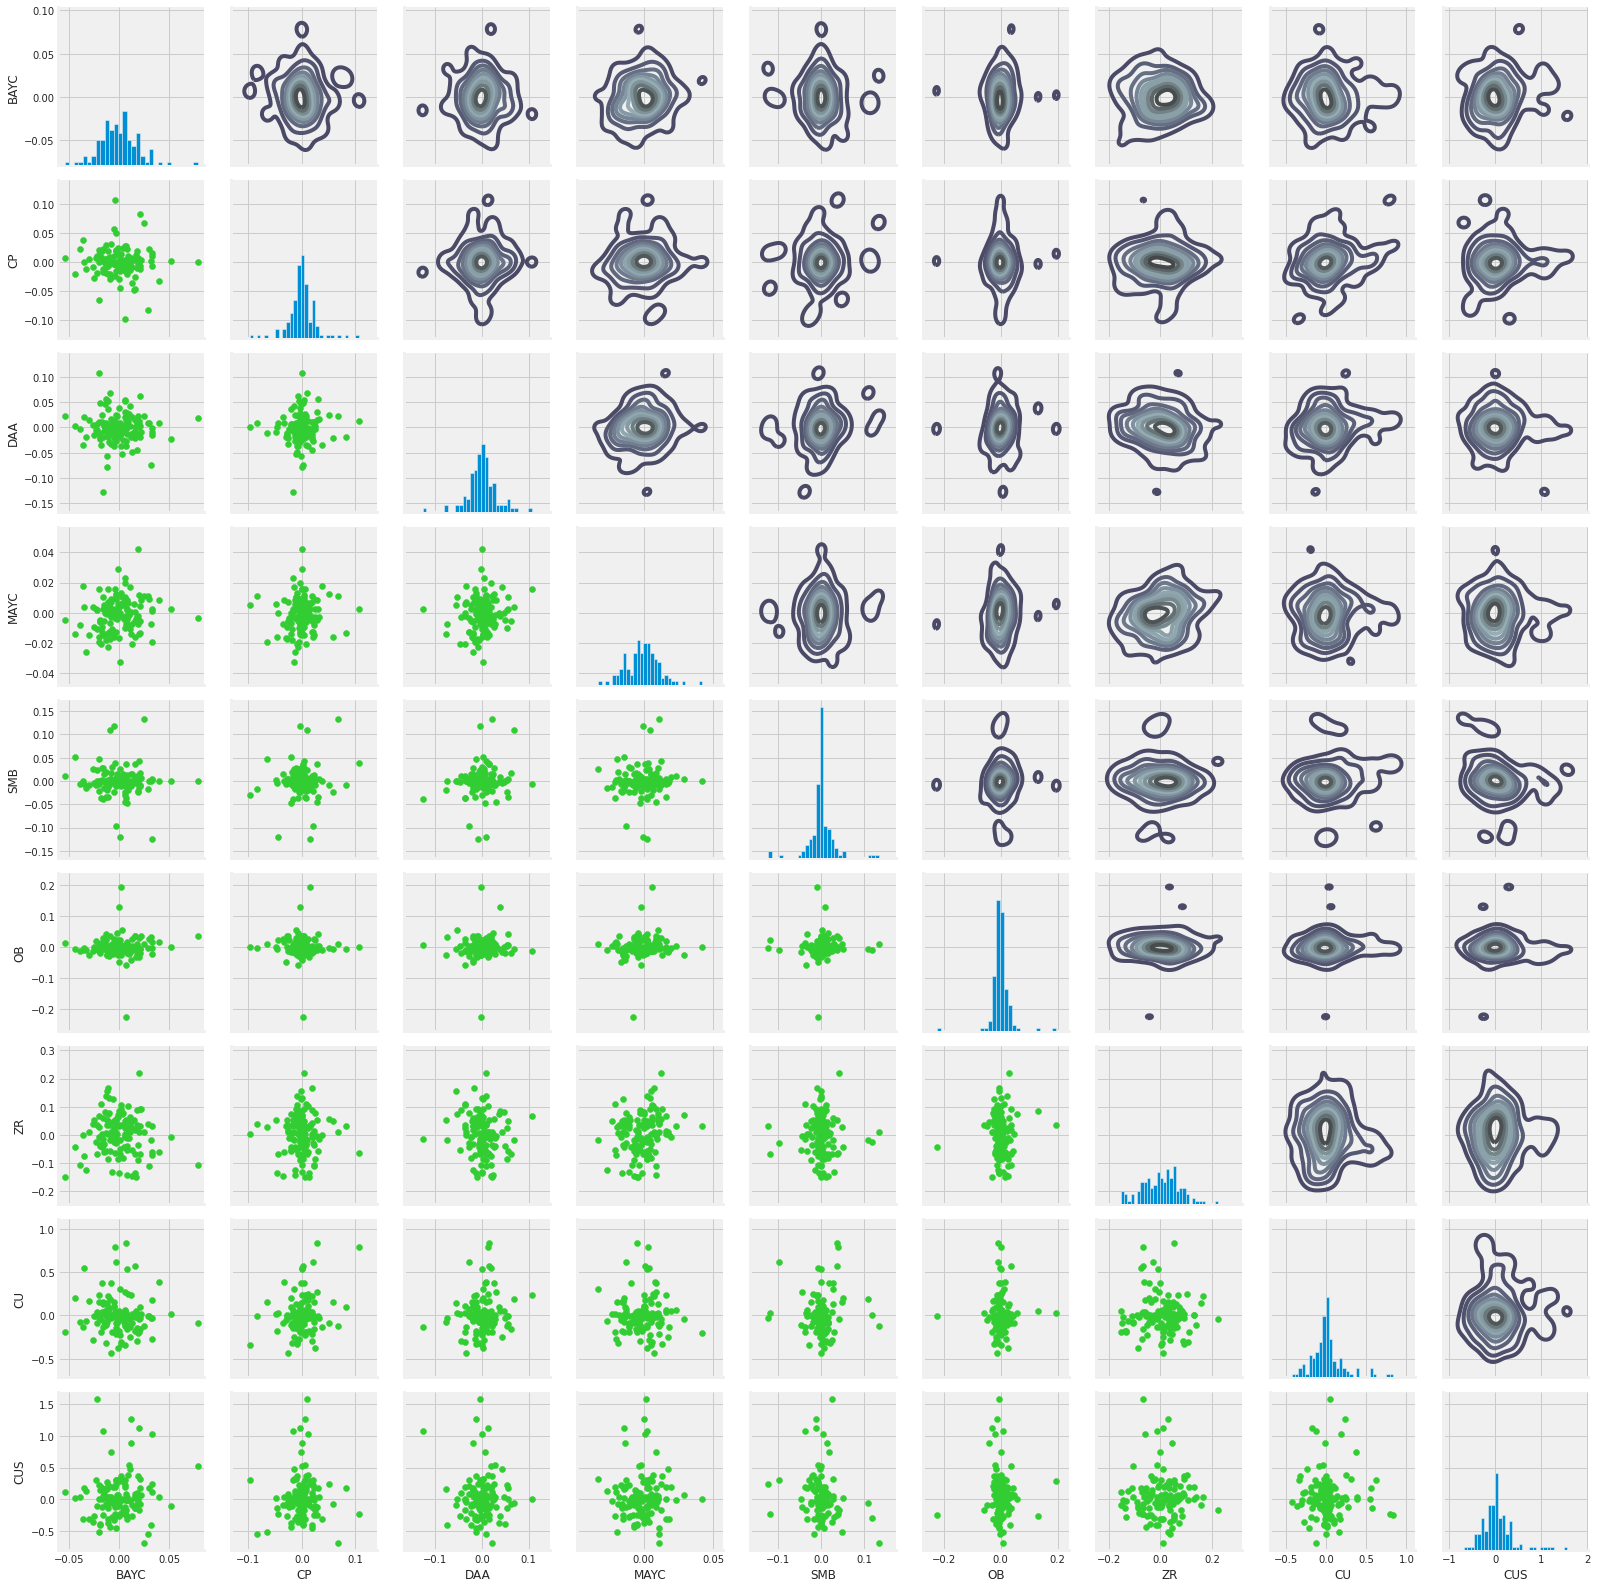

In [ ]:
#plotting correlation to showcase power of seaborn library
return_fig = sns.PairGrid(collection_pct_returns.dropna())

# Defining graph type scatter plot in lower triangle
return_fig.map_lower(plt.scatter, color='limegreen')

# Definnig graph type kdeplot in uper triangle
return_fig.map_upper(sns.kdeplot, cmap='bone_d')

# Finally, defining graph type histogram at diagonal
return_fig.map_diag(plt.hist, bins=30)

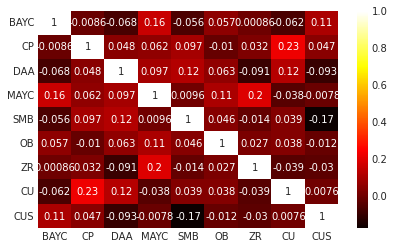

In [ ]:
# creating heat map to see correlation between all the NFT collections percentage returns
sns.heatmap(collection_pct_returns.corr(), annot=True, cmap='hot')

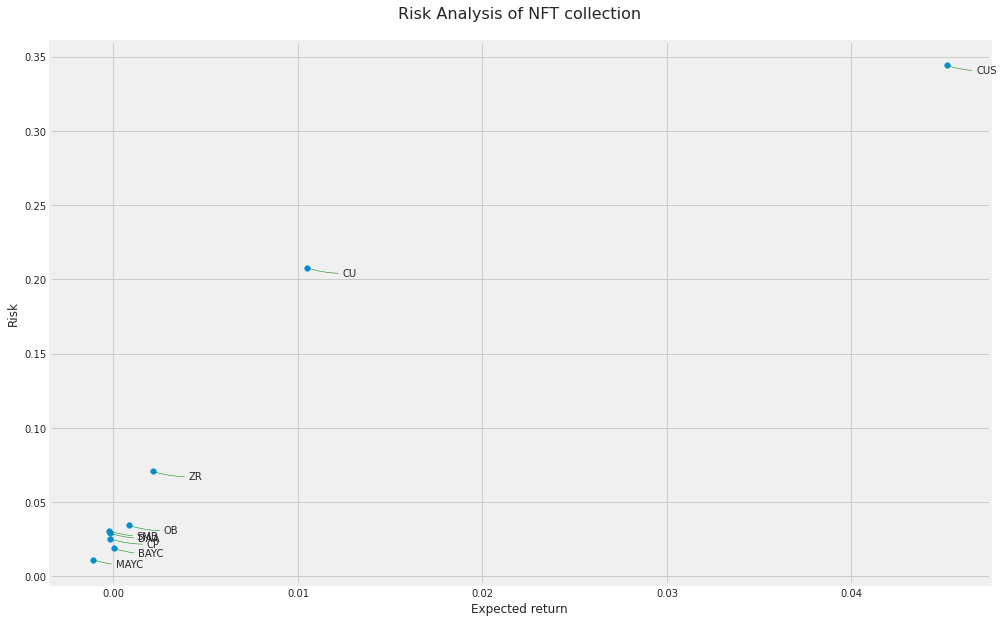

In [ ]:
#plotting risk and reward for each NFT collection
pct_returns = collection_pct_returns.dropna()

area = np.pi * 10

plt.figure(figsize=(15, 10))
plt.scatter(pct_returns.mean(), pct_returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

plt.title("Risk Analysis of NFT collection", fontsize=16,y=1.03)
for label, x, y in zip(pct_returns.columns, pct_returns.mean(), pct_returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, -10), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='green', connectionstyle='arc3,rad=-0.1'))

In [ ]:
#Creating copy of BAYC to perform LSTM mahine learning model
data =BAYC.filter(['logPrice'])
dataset = data.values
# Define length of data set 
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

123

Scale Data

In [ ]:
# scaling dataset between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 

print(scaled_data)
scaled_data.shape

[[0.83632636]
 [0.68667432]
 [0.78769843]
 [0.85284232]
 [0.80963413]
 [0.83970731]
 [0.76408042]
 [0.74125914]
 [0.74045653]
 [0.87552132]
 [0.81047457]
 [0.81135012]
 [0.79524153]
 [0.73789596]
 [0.77077612]
 [0.67384608]
 [0.52013713]
 [0.60342242]
 [0.88151688]
 [0.9124242 ]
 [0.7073367 ]
 [0.79387287]
 [0.90670069]
 [0.94516861]
 [0.90885917]
 [0.88189811]
 [0.88269402]
 [0.8675987 ]
 [0.88695505]
 [1.        ]
 [0.96418273]
 [0.83324953]
 [0.67562791]
 [0.86432393]
 [0.84001548]
 [0.76741624]
 [0.6204156 ]
 [0.5627175 ]
 [0.63603947]
 [0.62004977]
 [0.66199408]
 [0.46002466]
 [0.58074159]
 [0.50347634]
 [0.59841559]
 [0.52876355]
 [0.61006922]
 [0.60390526]
 [0.49912507]
 [0.48301325]
 [0.52830678]
 [0.55429977]
 [0.318508  ]
 [0.40980849]
 [0.4520821 ]
 [0.46438357]
 [0.40969329]
 [0.36441553]
 [0.39581193]
 [0.42980778]
 [0.54524677]
 [0.51240652]
 [0.39455866]
 [0.44104073]
 [0.45225601]
 [0.24057543]
 [0.54288995]
 [0.47232628]
 [0.31446046]
 [0.51003817]
 [0.44491527]
 [0.56

(153, 1)

Create training dataset

In [ ]:
# Create the training data set 
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.83632636, 0.68667432, 0.78769843, 0.85284232, 0.80963413,
       0.83970731, 0.76408042, 0.74125914, 0.74045653, 0.87552132,
       0.81047457, 0.81135012, 0.79524153, 0.73789596, 0.77077612,
       0.67384608, 0.52013713, 0.60342242, 0.88151688, 0.9124242 ,
       0.7073367 , 0.79387287, 0.90670069, 0.94516861, 0.90885917,
       0.88189811, 0.88269402, 0.8675987 , 0.88695505, 1.        ,
       0.96418273, 0.83324953, 0.67562791, 0.86432393, 0.84001548,
       0.76741624, 0.6204156 , 0.5627175 , 0.63603947, 0.62004977,
       0.66199408, 0.46002466, 0.58074159, 0.50347634, 0.59841559,
       0.52876355, 0.61006922, 0.60390526, 0.49912507, 0.48301325,
       0.52830678, 0.55429977, 0.318508  , 0.40980849, 0.4520821 ,
       0.46438357, 0.40969329, 0.36441553, 0.39581193, 0.42980778])]
[0.545246765451032]

[array([0.83632636, 0.68667432, 0.78769843, 0.85284232, 0.80963413,
       0.83970731, 0.76408042, 0.74125914, 0.74045653, 0.87552132,
       0.81047457, 0.81135012, 0.7952

(63, 60, 1)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(62))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 62)                4030      
                                                                 
 dense_1 (Dense)             (None, 1)                 63        
                                                                 
Total params: 120,061
Trainable params: 120,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
63/63 [==============================] - 5s 34ms/step - loss: 0.0199
Epoch 2/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0134
Epoch 3/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0134
Epoch 4/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0138
Epoch 5/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0120
Epoch 6/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0119
Epoch 7/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0118
Epoch 8/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0112
Epoch 9/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0116
Epoch 10/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0109
Epoch 11/30
63/63 [==============================] - 2s 34ms/step - loss: 0.0107
Epoch 12/30
63/63 [==============================] - 2s 33ms/step - loss: 0.0121
Epoch 13/30
63/63 [==================

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#predict the values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
def future_predict(
    model,
    days_in_future,
    sixty_days_scaled_data):
  
  x_test=[]
  predictions = []
  for i in range(60, len(sixty_days_scaled_data)):
    x_test.append(sixty_days_scaled_data[i-60:i, 0])

  x_test = np.array([sixty_days_scaled_data])
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  prediction = model.predict(x_test)
  predictions.append(prediction)
  
  for day in range(1, days_in_future):
    
    try:
      x_test[0] = np.append(x_test[0], prediction, axis =0)[1:,:]

      prediction = model.predict(x_test)
      predictions.append(prediction)
    except:
      break

  predictions = np.array(predictions) [:, :, 0]
  
  predictions = scaler.inverse_transform(predictions)
  predictions = np.exp(predictions)

  return predictions
  

In [ ]:
#predicting 10 days future values
pred=future_predict(model, 10, scaled_data[-60:])
print(pred)

[[128101.734]
 [129375.89 ]
 [124071.81 ]
 [117959.86 ]
 [112498.195]
 [107949.46 ]
 [104259.35 ]
 [101298.266]
 [ 98931.59 ]
 [ 97040.66 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


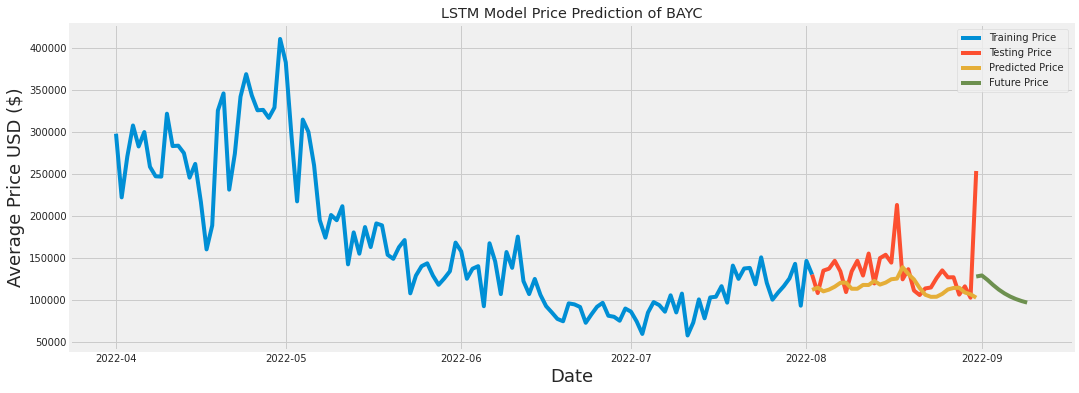

In [ ]:
# Plot the data for training, testing, predicted and future prices
train = data[:training_data_len+1]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('LSTM Model Price Prediction of BAYC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.plot(np.exp(train['logPrice']))
plt.plot(np.exp(valid[['logPrice', 'Predictions']]))
preddf = pd.DataFrame({'pred':list(pred)},index = pd.date_range(valid.index[-1], periods=len(pred), freq='d'))
preddf.head()
plt.plot(preddf)
plt.legend(['Training Price', 'Testing Price', 'Predicted Price','Future Price'], loc='upper right')
plt.show()

In [ ]:
#calculate error
loss = mean_squared_error(valid['logPrice'], valid['Predictions'])
print('Testing Mean Squared Error: %.3f' % loss)


Testing Mean Squared Error: 0.059


In [ ]:
#reset index of CP dataset
CP.reset_index(inplace=True)

In [ ]:
#Filtering salesDateEST and logPrice from the data set
CryptoPunksDf =CP.filter(['salesDateEST','logPrice'])
CryptoPunksDf

,salesDateEST,logPrice
0,2022-04-01,12.444349
1,2022-04-02,12.462284
2,2022-04-03,12.964687
3,2022-04-04,12.444172
4,2022-04-05,12.441899
...,...,...
141,2022-08-26,11.876611
142,2022-08-27,11.522911
143,2022-08-28,11.552484
144,2022-08-29,11.808100


In [ ]:
#Converting salesDateEST type from string to date
CryptoPunksDf['salesDateEST'] = pd.to_datetime(CryptoPunksDf['salesDateEST']).dt.date
CryptoPunksDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salesDateEST  146 non-null    object 
 1   logPrice      146 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
#spliting data into test and training data
train_data, test_data = CryptoPunksDf[0:int(len(CryptoPunksDf)*0.8)], CryptoPunksDf[int(len(CryptoPunksDf)*0.8):]

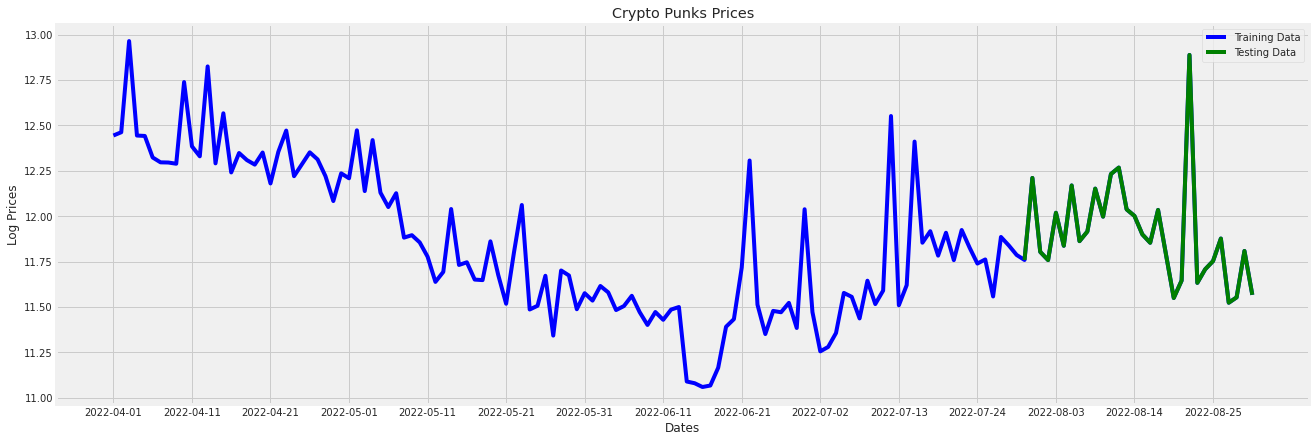

In [ ]:
#plotting test and training data
plt.figure(figsize=(20,7))
plt.title('Crypto Punks Prices')
plt.xlabel('Dates')
plt.ylabel('Log Prices')
plt.plot(CryptoPunksDf['logPrice'], 'blue', label='Training Data')
plt.plot(test_data['logPrice'], 'green', label='Testing Data')
plt.xticks(np.arange(0,146, 10), CryptoPunksDf['salesDateEST'][0:146:10])
plt.legend()
plt.show()


In [ ]:
#training ARIMA model for test data
train_ar = train_data['logPrice'].values
test_ar = test_data['logPrice'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

<class 'list'>


In [ ]:
#training ARIMA model for furute values
fp = list()
for t in range(10):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    fp.append(yhat)
    history.append(yhat)

In [ ]:
#model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  155
Model:                 ARIMA(5, 1, 1)   Log Likelihood                   6.153
Date:                Fri, 30 Sep 2022   AIC                              1.695
Time:                        11:50:21   BIC                             22.953
Sample:                             0   HQIC                            10.330
                                - 155                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0327      0.281      0.116      0.907      -0.518       0.583
ar.L2         -0.0434      0.225     -0.193      0.847      -0.485       0.398
ar.L3          0.1808      0.188      0.964      0.335      -0.187       0.548
ar.L4          0.0068      0.165      0.041      0.967      -0.317       0.330
ar.L5         -0.0060      0.112     -0.054      0.957      -0.226       0.214
ma.L1         -0.7692      0.297     -2.587      0.010      -1.352      -0.186
sigma2         0.0538      0.004     14.719      0.000       0.047       0.061
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               312.53
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             1.88
Prob(H) (two-sided):                  0.13   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

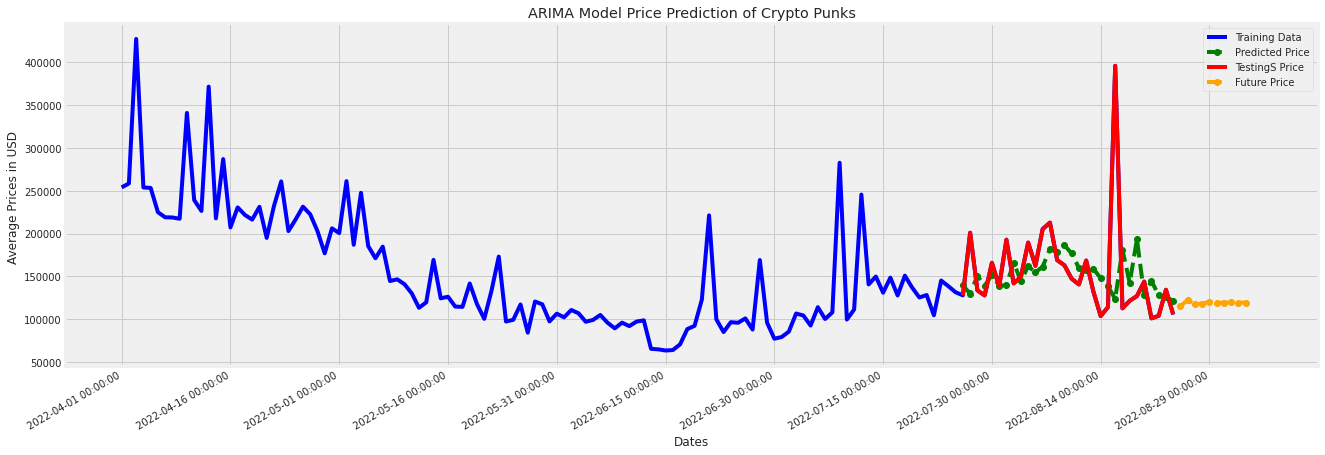

In [ ]:
#plotting test, training, predicted and future prices
plt.figure(figsize=(20,7))
plt.plot(np.exp(CryptoPunksDf['logPrice']), 'green', color='blue', label='Training Data')
plt.plot(test_data.index, np.exp(predictions), color='green', marker='o', linestyle='--', 
         label='Predicted Price')
plt.plot(test_data.index, np.exp(test_data['logPrice']), color='red', label='TestingS Price')
plt.plot(pd.RangeIndex(start=146, stop=156, step=1), np.exp(fp), color='orange', marker='o', linestyle='--', label='Future Price')
plt.title('ARIMA Model Price Prediction of Crypto Punks')
plt.xlabel('Dates')
plt.ylabel('Average Prices in USD ')
plt.xticks(np.arange(0,166, 15), pd.date_range(start="2022-04-01", end="2022-09-10", freq="d")[0::15])
plt.gcf().autofmt_xdate()
plt.legend()

In [ ]:
#converting predted data to list
pred = np.array(predictions)
pred.tolist()

[11.845860003203398,
 11.772549165340878,
 11.923440505746889,
 11.842524545193118,
 11.928975733850997,
 11.844490513205331,
 11.846985117281534,
 12.019036935540598,
 11.880361125518563,
 11.994920420305695,
 11.948334321726673,
 11.991514406202874,
 12.110693716305367,
 12.09307455361437,
 12.1348502017968,
 12.082167010744605,
 11.981381221618156,
 11.96481581897944,
 11.975913377174336,
 11.902989376276054,
 11.836694071574575,
 11.72688797949512,
 12.107251880764498,
 11.86547874359526,
 12.172697496592438,
 11.760124431216894,
 11.879856838295385,
 11.761816853835834,
 11.743509720109234,
 11.705698821759068]

In [ ]:
#calculating error
loss = mean_squared_error(test_data['logPrice'], pred)
print('Testing Mean Squared Error: %.3f' % loss)

Testing Mean Squared Error: 0.091
